<a href="https://colab.research.google.com/github/ammad3059/pandas/blob/master/fashion_mnist_DNN_and_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Working on fashion mnist dataset of keras using both DNN and CNN

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [3]:
print(tf.__version__)

2.3.0


In [4]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import models,layers

In [5]:
(train_imgs,train_labels),(test_imgs,test_labels)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
train_imgs.shape

(60000, 28, 28)

In [7]:
test_imgs.shape

(10000, 28, 28)

In [8]:
from tensorflow.keras.utils import normalize

train_imgs=normalize(train_imgs,axis=1)
test_imgs=normalize(test_imgs,axis=1)

In [9]:
train_imgs[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00163724, 0.        , 0.        , 0.        , 0.        ,
        0.04180052, 0.18134076, 0.10028745, 0.05368613, 0.04603788,
        0.04237663, 0.08378428, 0.16247149, 0.13003419, 0.01660002,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00499015, 0.        ,
        0.        , 0.        , 0.07339813, 0.12962956, 0.20854845,
        0.22021736, 0.2199239 , 0.22978485, 0.25351783, 0.24457622,
        0.25130325, 0.24557461, 0.20985901, 0.21020565, 0.26352532,
        0.2105115 , 0.2030959 , 0.07008266, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.02292136, 0.27862859, 0.33253847, 0.2135075 , 0.20188251,
        0.20696353, 0.19098655, 0.19083826, 0.19883751, 0.20621132,
        0.2010426 , 0.1945

In [10]:
mymodel=models.Sequential()
mymodel.add(layers.Flatten())
mymodel.add(layers.Dense(512,activation='relu'))
mymodel.add(layers.Dense(64,activation='relu'))
mymodel.add(layers.Dense(10,activation='softmax'))

In [11]:
mymodel.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [12]:
mymodel.fit(train_imgs,train_labels,epochs=10,validation_split=0.2,batch_size=50)

Epoch 1/10
960/960 [==============================] - 6s 6ms/step - loss: 0.4886 - accuracy: 0.8197 - val_loss: 0.3857 - val_accuracy: 0.8574
Epoch 2/10
960/960 [==============================] - 6s 6ms/step - loss: 0.3586 - accuracy: 0.8672 - val_loss: 0.3632 - val_accuracy: 0.8716
Epoch 3/10
960/960 [==============================] - 6s 6ms/step - loss: 0.3159 - accuracy: 0.8825 - val_loss: 0.3342 - val_accuracy: 0.8779
Epoch 4/10
960/960 [==============================] - 5s 6ms/step - loss: 0.2926 - accuracy: 0.8891 - val_loss: 0.3304 - val_accuracy: 0.8799
Epoch 5/10
960/960 [==============================] - 5s 6ms/step - loss: 0.2751 - accuracy: 0.8967 - val_loss: 0.3211 - val_accuracy: 0.8816
Epoch 6/10
960/960 [==============================] - 5s 6ms/step - loss: 0.2560 - accuracy: 0.9024 - val_loss: 0.3146 - val_accuracy: 0.8873
Epoch 7/10
960/960 [==============================] - 5s 6ms/step - loss: 0.2414 - accuracy: 0.9083 - val_loss: 0.3155 - val_accuracy: 0.8842
Epoch 

In [13]:
loss,acc=mymodel.evaluate(test_imgs,test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3358 - accuracy: 0.8847


In [14]:
predict=mymodel.predict([test_imgs])

Consider rewriting this model with the Functional API.


6


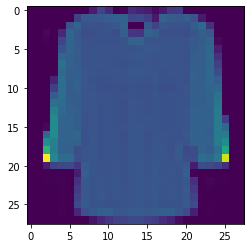

In [15]:
print(np.argmax(predict[145]))

plt.imshow(test_imgs[145])
plt.show()

4


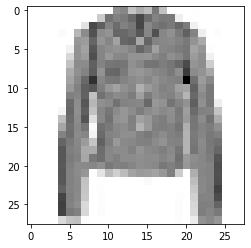

In [17]:
print(np.argmax(predict[10]))

plt.imshow(test_imgs[10],cmap=plt.cm.binary)
plt.show()

5


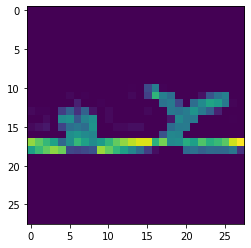

In [18]:
print(np.argmax(predict[1448]))

plt.imshow(test_imgs[1448])
plt.show()

9


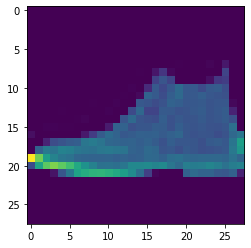

In [19]:
print(np.argmax(predict[0]))

plt.imshow(test_imgs[0])
plt.show()

NOW using Convolutional neural network for same dataset

In [20]:
train_imgs[0].shape

(28, 28)

In [21]:
train_imgs2=train_imgs.reshape(train_imgs.shape[0],train_imgs[0].shape[0],train_imgs[0].shape[1],1)
test_imgs2=test_imgs.reshape(test_imgs.shape[0],test_imgs[0].shape[0],test_imgs[0].shape[1],1)

In [22]:
train_imgs2.shape

(60000, 28, 28, 1)

In [33]:
cnnmodel=models.Sequential()
cnnmodel.add(layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
cnnmodel.add(layers.MaxPooling2D(pool_size=(2,2)))
cnnmodel.add(layers.Conv2D(32,(3,3),activation='relu'))
cnnmodel.add(layers.MaxPooling2D(pool_size=(2,2)))
cnnmodel.add(layers.Flatten())
cnnmodel.add(layers.Dense(64,activation='relu'))
cnnmodel.add(layers.Dense(10,activation='softmax'))

In [34]:
cnnmodel.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [35]:
cnnmodel.fit(train_imgs2,train_labels,epochs=4,validation_split=0.3,batch_size=10)

Epoch 1/4
4200/4200 [==============================] - 64s 15ms/step - loss: 0.4926 - acc: 0.8179 - val_loss: 0.3641 - val_acc: 0.8640
Epoch 2/4
4200/4200 [==============================] - 63s 15ms/step - loss: 0.3430 - acc: 0.8719 - val_loss: 0.3360 - val_acc: 0.8743
Epoch 3/4
4200/4200 [==============================] - 63s 15ms/step - loss: 0.2990 - acc: 0.8888 - val_loss: 0.3232 - val_acc: 0.8813
Epoch 4/4
4200/4200 [==============================] - 63s 15ms/step - loss: 0.2696 - acc: 0.8985 - val_loss: 0.3090 - val_acc: 0.8849
